In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [21]:
IMAGE_SIZE = 256
CHANNELS = 3

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'qualityDataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 165 images belonging to 2 classes.


In [23]:
train_generator.class_indices

{'bad': 0, 'good': 1}

In [24]:
class_names = list(train_generator.class_indices.keys())
class_names

['bad', 'good']

In [25]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.8144326  0.91545206 0.43780586]
  [0.81193197 0.9133086  0.43387625]
  [0.8094313  0.91116524 0.42994663]
  ...
  [0.51460165 0.6039216  0.3398833 ]
  [0.50766724 0.5978633  0.33119664]
  [0.5058824  0.59607846 0.32941177]]

 [[0.8426945  0.94073373 0.47891366]
  [0.8398366  0.93787587 0.47569853]
  [0.83697873 0.93501794 0.4724834 ]
  ...
  [0.51424444 0.6039216  0.33881158]
  [0.50695276 0.59714884 0.33048218]
  [0.5058824  0.59607846 0.32941177]]

 [[0.8721191  0.9683409  0.5095173 ]
  [0.86997575 0.9669119  0.5080884 ]
  [0.8678323  0.965483   0.50665945]
  ...
  [0.5138872  0.6039216  0.33773988]
  [0.5062383  0.5964344  0.3297677 ]
  [0.5058824  0.59607846 0.32941177]]

 ...

 [[0.17011103 0.10441957 0.07696858]
  [0.17254902 0.10588236 0.07501371]
  [0.1589436  0.09227692 0.05410165]
  ...
  [0.06666667 0.07450981 0.05490196]
  [0.06666667 0.07450981 0.05490196]
  [0.06666667 0.07450981 0.05490196]]

 [[0.17189723 0.10549127 0.07804029]
  [0.17254902 0.10588236 0.07465647]


In [26]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'qualityDataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 23 images belonging to 2 classes.


In [27]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'qualityDataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 48 images belonging to 2 classes.


In [28]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.30237904 0.32170808 0.06413922]
  [0.31268862 0.32399252 0.10173038]
  [0.2764293  0.27259874 0.09293459]
  ...
  [0.21977971 0.27076012 0.00341118]
  [0.21716954 0.2681499  0.00123604]
  [0.21568629 0.26666668 0.        ]]

 [[0.30136958 0.3224555  0.06156264]
  [0.31276605 0.3251704  0.09876259]
  [0.2815276  0.27898213 0.0948057 ]
  ...
  [0.21568629 0.26666668 0.        ]
  [0.21568629 0.26666668 0.        ]
  [0.21634075 0.26715752 0.00081808]]

 [[0.30049953 0.3237606  0.05982252]
  [0.31146094 0.32473534 0.0944123 ]
  [0.28544286 0.2846375  0.09567575]
  ...
  [0.22844999 0.27623945 0.01595462]
  [0.2301901  0.27754456 0.01812976]
  [0.23234846 0.27912843 0.02100197]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.01496611 0.01656681 0.00392157]
  [0.01803135 0.01879992 0.00234507]
  [0.01413398 0.01176471 0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]


In [29]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    epochs=100,
)

Epoch 1/100
4/4 [==============================] - 15s 4s/step - loss: 0.5104 - accuracy: 0.7031 - val_loss: 0.5279 - val_accuracy: 0.8696
Epoch 2/100
4/4 [==============================] - 11s 2s/step - loss: 0.3797 - accuracy: 0.8812 - val_loss: 0.4245 - val_accuracy: 0.8696
Epoch 3/100
4/4 [==============================] - 14s 4s/step - loss: 0.3843 - accuracy: 0.8594 - val_loss: 0.4415 - val_accuracy: 0.8696
Epoch 4/100
4/4 [==============================] - 11s 3s/step - loss: 0.3611 - accuracy: 0.8812 - val_loss: 0.4261 - val_accuracy: 0.8696
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 0.4198 - accuracy: 0.8515 - val_loss: 0.4244 - val_accuracy: 0.8696
Epoch 6/100
4/4 [==============================] - 11s 2s/step - loss: 0.3849 - accuracy: 0.8614 - val_loss: 0.4196 - val_accuracy: 0.8696
Epoch 7/100
4/4 [==============================] - 13s 3s/step - loss: 0.3916 - accuracy: 0.8438 - val_loss: 0.4228 - val_accuracy: 0.8696
Epoch 8/100
4/4 [==========

4/4 [==============================] - 11s 3s/step - loss: 0.0724 - accuracy: 0.9802 - val_loss: 1.3009 - val_accuracy: 0.8696
Epoch 60/100
4/4 [==============================] - 11s 3s/step - loss: 0.0878 - accuracy: 0.9703 - val_loss: 1.5262 - val_accuracy: 0.7826
Epoch 61/100
4/4 [==============================] - 11s 3s/step - loss: 0.1058 - accuracy: 0.9307 - val_loss: 1.5544 - val_accuracy: 0.6957
Epoch 62/100
4/4 [==============================] - 13s 3s/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 1.5188 - val_accuracy: 0.7391
Epoch 63/100
4/4 [==============================] - 13s 3s/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 1.5309 - val_accuracy: 0.8261
Epoch 64/100
4/4 [==============================] - 11s 3s/step - loss: 0.0463 - accuracy: 0.9901 - val_loss: 1.5453 - val_accuracy: 0.7826
Epoch 65/100
4/4 [==============================] - 11s 3s/step - loss: 0.0487 - accuracy: 0.9802 - val_loss: 1.8397 - val_accuracy: 0.7826
Epoch 66/100
4/4 [===============

In [33]:
scores = model.evaluate(test_generator)

2/2 [==============================] - 2s 547ms/step - loss: 1.8717 - accuracy: 0.8333


In [34]:
scores

[1.8717479705810547, 0.8333333134651184]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 4}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])

list

In [39]:
len(history.history['loss'])

100

In [40]:
history.history['loss'][:5]

[0.5104255676269531,
 0.3797062337398529,
 0.3842521905899048,
 0.361075758934021,
 0.41975945234298706]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [42]:
val_acc

[0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8695651888847351,
 0.8260869383811951,
 0.8695651888847351,
 0.6521739363670349,
 0.782608687877655,
 0.695652186870575,
 0.8260869383811951,
 0.9130434989929199,
 0.9130434989929199,
 0.8260869383811951,
 0.782608687877655,
 0.8695651888847351,
 0.782608687877655,
 0.739130437374115,
 0.782608687877655,
 0.782608687877655,
 0.739130437374115,
 0.695652186870575,
 0.782608687877655,
 0.8695651888847351,
 0.9130434989929199,
 0

In [43]:
acc

[0.703125,
 0.8811880946159363,
 0.859375,
 0.8811880946159363,
 0.8514851331710815,
 0.8613861203193665,
 0.84375,
 0.859375,
 0.8515625,
 0.8671875,
 0.859375,
 0.8712871074676514,
 0.890625,
 0.8811880946159363,
 0.8515625,
 0.8514851331710815,
 0.875,
 0.8515625,
 0.8415841460227966,
 0.8316831588745117,
 0.8415841460227966,
 0.8828125,
 0.84375,
 0.8712871074676514,
 0.8671875,
 0.8217821717262268,
 0.8613861203193665,
 0.8415841460227966,
 0.8415841460227966,
 0.9140625,
 0.9108911156654358,
 0.9140625,
 0.90625,
 0.8984375,
 0.8811880946159363,
 0.9405940771102905,
 0.9375,
 0.9140625,
 0.9375,
 0.953125,
 0.9009901285171509,
 0.8984375,
 0.9405940771102905,
 0.9296875,
 0.9504950642585754,
 0.8316831588745117,
 0.9375,
 0.8811880946159363,
 0.9306930899620056,
 0.9405940771102905,
 0.96875,
 0.9702970385551453,
 0.9140625,
 0.921875,
 0.9504950642585754,
 0.9702970385551453,
 0.9609375,
 0.9765625,
 0.9801980257034302,
 0.9702970385551453,
 0.9306930899620056,
 0.9765625,
 1.0,

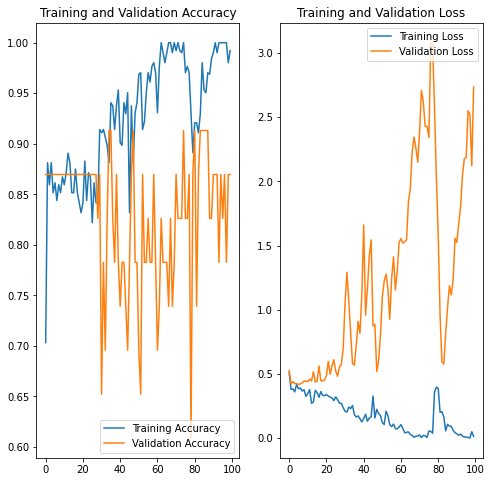

In [44]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
class_names = list(train_generator.class_indices.keys())
class_names

['bad', 'good']

first image to predict
actual label: bad
predicted label: bad


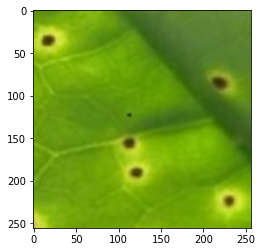

In [46]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

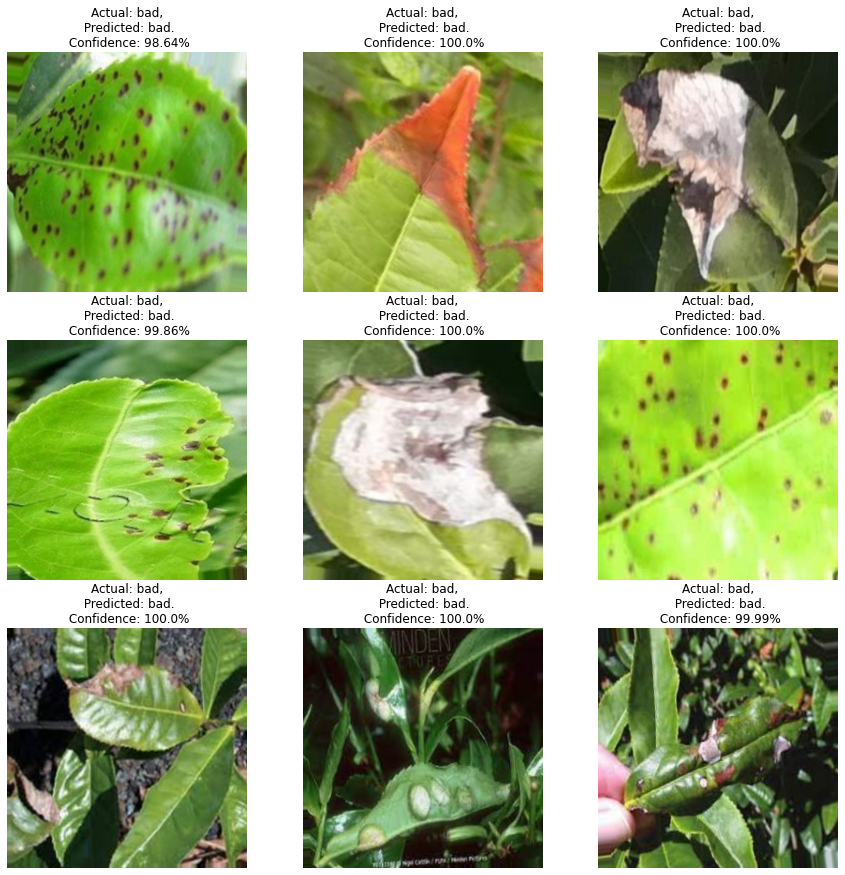

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [50]:
import os
model_version=max([int(i) for i in os.listdir("../saved_quality_model") + [0]])+1
model.save(f"../saved_quality_model/{model_version}")

INFO:tensorflow:Assets written to: ../saved_quality_model/1\assets
